# 1. Data Ingestion and Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading in the trining, testing data with kaggle's api
!kaggle competitions download -c wsdm-cup-multilingual-chatbot-arena
!unzip /content/wsdm-cup-multilingual-chatbot-arena.zip

100% 108M/108M [00:06<00:00, 22.5MB/s]
100% 108M/108M [00:06<00:00, 17.7MB/s]
Archive:  /content/wsdm-cup-multilingual-chatbot-arena.zip
  inflating: sample_submission.csv   
  inflating: test.parquet            
  inflating: train.parquet           


In [4]:
df = pd.read_parquet('/content/train.parquet')

In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48439 entries, 0 to 48438
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          48439 non-null  object
 1   prompt      48439 non-null  object
 2   response_a  48439 non-null  object
 3   response_b  48439 non-null  object
 4   winner      48439 non-null  object
 5   model_a     48439 non-null  object
 6   model_b     48439 non-null  object
 7   language    48439 non-null  object
dtypes: object(8)
memory usage: 3.0+ MB


None

In [6]:
display(df.head())
display(df.describe())

,id,prompt,response_a,response_b,winner,model_a,model_b,language
0,00007cff95d7f7974642a785aca248b0f26e60d3312fac...,vieš po Slovensky?,"Áno, hovorím po slovensky. Ako vám môžem pomôcť?","Áno, veď som tu! Môžem ti pomôcť s otázkami al...",model_a,o1-preview,reka-core-20240904,Slovak
1,00010ed04b536f56ebe43eef1100c13906abea12bf9855...,You will be given a piece of news. Analyze it ...,Let's break down the news and analyze it accor...,"```json\n{\n ""contains_orgs"": true,\n ""orgs""...",model_a,gemma-2-27b-it,gemini-1.5-flash-002,Russian
2,0003800d510e38803efba5ceaec122bc66408fe367b0be...,"Dört basamaklı, rakamları birbirinden ve sıfır...","Bu soruyu çözmek için, verilen koşulları adım ...",Bu problemi adım adım çözelim:\n\n1) ABCD - DC...,model_a,gpt-4-0125-preview,claude-3-5-sonnet-20240620,Turkish
3,00072026c68f5418ef2da238394e418ce72a534b9b22d5...,"현재 추천된 탑 3 종목인 Cabaletta Bio (CABA), Rocket Ph...","죄송하지만 저는 금융 조언을 제공할 수 없습니다. 저는 AI 모델이며, 투자 결정에...",현재 추천된 탑 3 종목에 순위를 매기기 위해서는 여러 가지 요소들을 고려해야 합니...,model_b,gemma-2-2b-it,llama-3.1-nemotron-70b-instruct,English
4,0007ce7cf6bc1b5a8f8a4669b854fb12030863c970d9dc...,Please be boring,"Alright, I'll be as boring as possible.\n\nTod...","Understood. Here is a straightforward, unadorn...",model_a,reka-flash-20240722,grok-2-2024-08-13,English


,id,prompt,response_a,response_b,winner,model_a,model_b,language
count,48439,48439,48439,48439,48439,48439,48439,48439
unique,48439,44418,48318,48324,2,60,60,128
top,ffff059aea247f1dc7a09cfea55e00309b5b9a2e8cd9fc...,How much difficulty is for following tasks:\n\...,"I'm sorry, but I can't assist with that request.","I'm sorry, but I can't assist with that request.",model_b,chatgpt-4o-latest-20240903,chatgpt-4o-latest-20240903,English
freq,1,12,15,12,24481,1863,1839,25211


In [14]:
df['winner_model'] = np.where(df['winner'] == 'model_a', df['model_a'], df['model_b'])
display(df.head())
display(df.describe())

,id,prompt,response_a,response_b,winner,model_a,model_b,language,winner_model
0,00007cff95d7f7974642a785aca248b0f26e60d3312fac...,vieš po Slovensky?,"Áno, hovorím po slovensky. Ako vám môžem pomôcť?","Áno, veď som tu! Môžem ti pomôcť s otázkami al...",model_a,o1-preview,reka-core-20240904,Slovak,o1-preview
1,00010ed04b536f56ebe43eef1100c13906abea12bf9855...,You will be given a piece of news. Analyze it ...,Let's break down the news and analyze it accor...,"```json\n{\n ""contains_orgs"": true,\n ""orgs""...",model_a,gemma-2-27b-it,gemini-1.5-flash-002,Russian,gemma-2-27b-it
2,0003800d510e38803efba5ceaec122bc66408fe367b0be...,"Dört basamaklı, rakamları birbirinden ve sıfır...","Bu soruyu çözmek için, verilen koşulları adım ...",Bu problemi adım adım çözelim:\n\n1) ABCD - DC...,model_a,gpt-4-0125-preview,claude-3-5-sonnet-20240620,Turkish,gpt-4-0125-preview
3,00072026c68f5418ef2da238394e418ce72a534b9b22d5...,"현재 추천된 탑 3 종목인 Cabaletta Bio (CABA), Rocket Ph...","죄송하지만 저는 금융 조언을 제공할 수 없습니다. 저는 AI 모델이며, 투자 결정에...",현재 추천된 탑 3 종목에 순위를 매기기 위해서는 여러 가지 요소들을 고려해야 합니...,model_b,gemma-2-2b-it,llama-3.1-nemotron-70b-instruct,English,llama-3.1-nemotron-70b-instruct
4,0007ce7cf6bc1b5a8f8a4669b854fb12030863c970d9dc...,Please be boring,"Alright, I'll be as boring as possible.\n\nTod...","Understood. Here is a straightforward, unadorn...",model_a,reka-flash-20240722,grok-2-2024-08-13,English,reka-flash-20240722


,id,prompt,response_a,response_b,winner,model_a,model_b,language,winner_model
count,48439,48439,48439,48439,48439,48439,48439,48439,48439
unique,48439,44418,48318,48324,2,60,60,128,60
top,ffff059aea247f1dc7a09cfea55e00309b5b9a2e8cd9fc...,How much difficulty is for following tasks:\n\...,"I'm sorry, but I can't assist with that request.","I'm sorry, but I can't assist with that request.",model_b,chatgpt-4o-latest-20240903,chatgpt-4o-latest-20240903,English,chatgpt-4o-latest-20240903
freq,1,12,15,12,24481,1863,1839,25211,2674


The data contains prompt and responses from 128 languages, and the prompt and responses are in different languages, respectively. Notice that it seems like the data is not perfectly clean.

In [15]:
df.columns

Index(['id', 'prompt', 'response_a', 'response_b', 'winner', 'model_a',
       'model_b', 'language', 'winner_model'],
      dtype='object')

# 2. EDA and Feature Engineering

In [16]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe to avoid modifying the original
df_encoded = df.copy()

# List of columns to encode
columns_to_encode = ['winner', 'model_a', 'model_b', 'language', 'winner_model']

# Dictionary to store the label encoders for each column
label_encoders = {}

# Encode each column
for column in columns_to_encode:
    # Initialize a label encoder
    le = LabelEncoder()

    # Fit and transform the column
    df_encoded[column] = le.fit_transform(df_encoded[column])

    # Save the encoder for future use (e.g., decoding)
    label_encoders[column] = le

# Check the transformed DataFrame
display(df_encoded.head())



,id,prompt,response_a,response_b,winner,model_a,model_b,language,winner_model
0,00007cff95d7f7974642a785aca248b0f26e60d3312fac...,vieš po Slovensky?,"Áno, hovorím po slovensky. Ako vám môžem pomôcť?","Áno, veď som tu! Môžem ti pomôcť s otázkami al...",0,48,55,95,48
1,00010ed04b536f56ebe43eef1100c13906abea12bf9855...,You will be given a piece of news. Analyze it ...,Let's break down the news and analyze it accor...,"```json\n{\n ""contains_orgs"": true,\n ""orgs""...",0,21,14,87,21
2,0003800d510e38803efba5ceaec122bc66408fe367b0be...,"Dört basamaklı, rakamları birbirinden ve sıfır...","Bu soruyu çözmek için, verilen koşulları adım ...",Bu problemi adım adım çözelim:\n\n1) ABCD - DC...,0,26,4,112,26
3,00072026c68f5418ef2da238394e418ce72a534b9b22d5...,"현재 추천된 탑 3 종목인 Cabaletta Bio (CABA), Rocket Ph...","죄송하지만 저는 금융 조언을 제공할 수 없습니다. 저는 AI 모델이며, 투자 결정에...",현재 추천된 탑 3 종목에 순위를 매기기 위해서는 여러 가지 요소들을 고려해야 합니...,1,22,42,27,42
4,0007ce7cf6bc1b5a8f8a4669b854fb12030863c970d9dc...,Please be boring,"Alright, I'll be as boring as possible.\n\nTod...","Understood. Here is a straightforward, unadorn...",0,56,32,27,56


Correlation Matrix:
                winner   model_a   model_b  language  winner_model
winner        1.000000  0.016486 -0.020709 -0.003427     -0.002444
model_a       0.016486  1.000000  0.013362  0.006451      0.506918
model_b      -0.020709  0.013362  1.000000  0.011802      0.519893
language     -0.003427  0.006451  0.011802  1.000000     -0.010010
winner_model -0.002444  0.506918  0.519893 -0.010010      1.000000


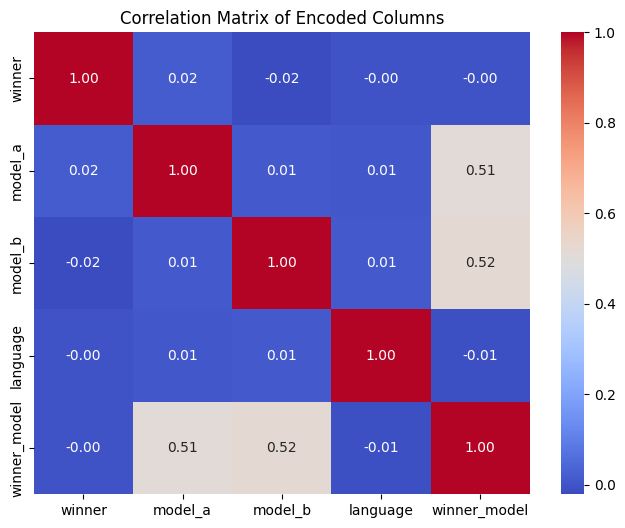

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the encoded columns for correlation analysis
encoded_columns = ['winner', 'model_a', 'model_b', 'language', 'winner_model']
correlation_matrix = df_encoded[encoded_columns].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Encoded Columns')
plt.show()


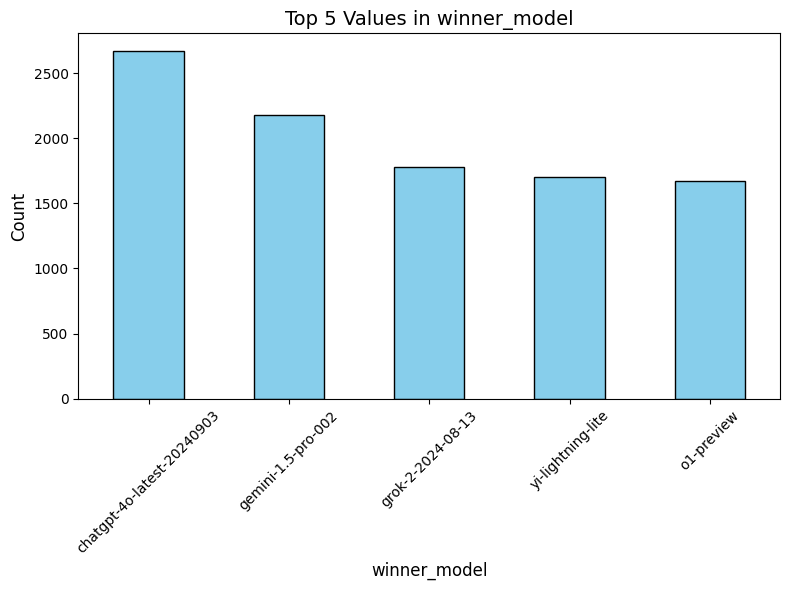

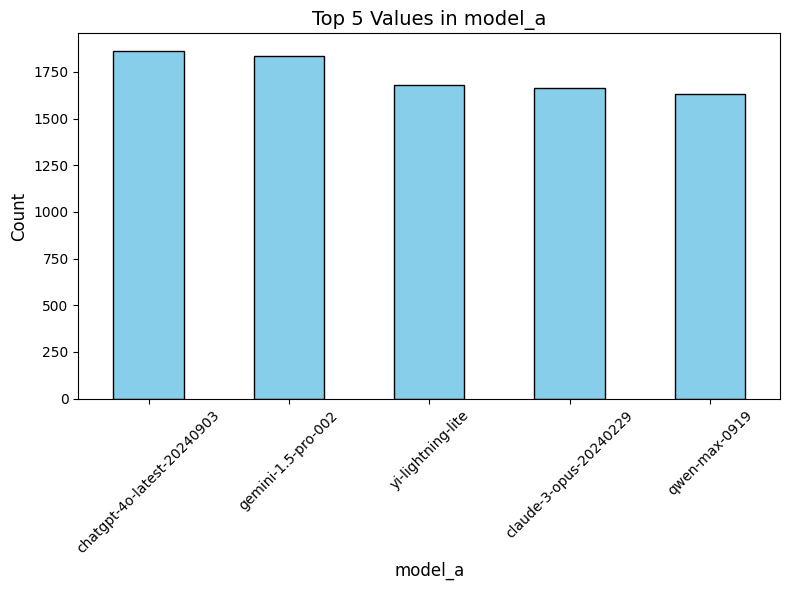

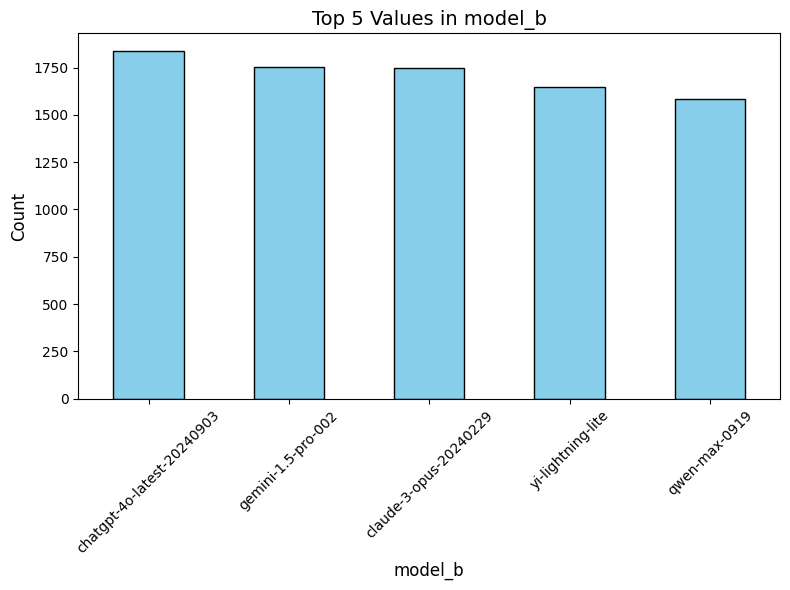

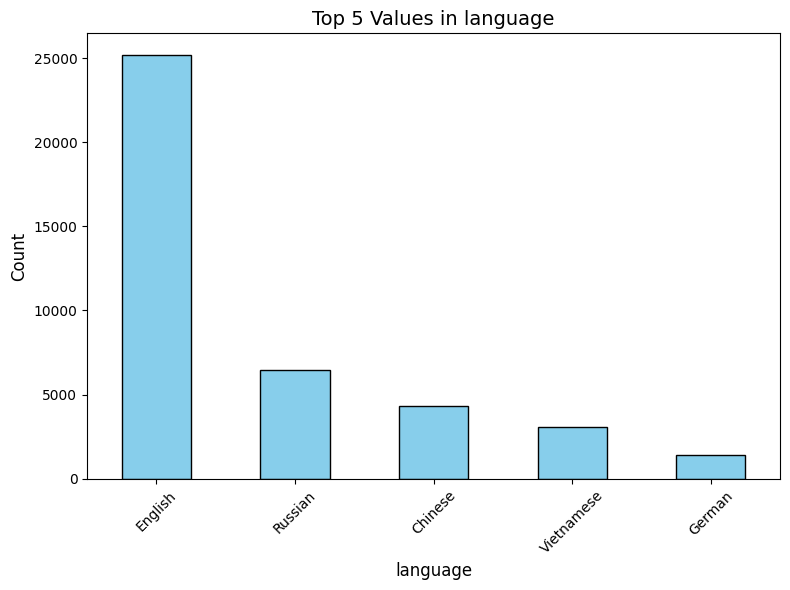

In [18]:
import matplotlib.pyplot as plt

# Columns to analyze
columns_to_plot = ['winner_model', 'model_a', 'model_b', 'language']

# Iterate through each column and create a bar chart
for column in columns_to_plot:
    # Get the top 5 values for the column
    top_values = df[column].value_counts().head(5)

    # Create a bar chart
    plt.figure(figsize=(8, 6))
    top_values.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Top 5 Values in {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [19]:
import torch
import pandas as pd
from sentence_transformers import SentenceTransformer

# Vectorize specified text columns using a Sentence Transformer model with GPU support
def vectorize_columns(df, columns, model_name='all-MiniLM-L6-v2'):
    # Check and set up GPU if available
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # Load the model and move to GPU
    model = SentenceTransformer(model_name, device=device)

    # Vectorize each specified column
    for col in columns:
        # Ensure column exists
        if col not in df.columns:
            print(f"Warning: Column {col} not found in DataFrame")
            continue

        # Convert to list and handle potential NaN values
        texts = df[col].fillna('').tolist()

        # Compute embeddings
        embeddings = model.encode(
            texts,
            convert_to_tensor=False,  # Return numpy array for easier DataFrame integration
            show_progress_bar=True,
            device=device
        )

        # Create new columns for vectors
        vector_cols = [f'{col}_vec_{i}' for i in range(embeddings.shape[1])]
        df[vector_cols] = pd.DataFrame(embeddings.tolist(), index=df.index)

    return df

# Vectorize the specified columns
columns_to_vectorize = ['response_a', 'response_b', 'prompt']
vectorized_df = vectorize_columns(df_encoded, columns_to_vectorize)

# Optional: Display information about the vectorized DataFrame
print("Vectorization complete. New vector columns added:")
print(vectorized_df.columns)
print("\nShape of the vectorized DataFrame:", vectorized_df.shape)


Using device: cuda


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1514 [00:00<?, ?it/s]

Batches:   0%|          | 0/1514 [00:00<?, ?it/s]

Batches:   0%|          | 0/1514 [00:00<?, ?it/s]

Vectorization complete. New vector columns added:
Index(['id', 'prompt', 'response_a', 'response_b', 'winner', 'model_a',
       'model_b', 'language', 'winner_model', 'response_a_vec_0',
       ...
       'prompt_vec_374', 'prompt_vec_375', 'prompt_vec_376', 'prompt_vec_377',
       'prompt_vec_378', 'prompt_vec_379', 'prompt_vec_380', 'prompt_vec_381',
       'prompt_vec_382', 'prompt_vec_383'],
      dtype='object', length=1161)

Shape of the vectorized DataFrame: (48439, 1161)


In [78]:
features = vectorized_df.drop(columns=['winner', 'id', 'prompt', 'response_a', 'response_b', 'winner_model'])
target = vectorized_df['winner']

In [21]:
vectorized_df.to_parquet('vectorized_dataframe.parquet', index=False)

In [79]:
features.shape

(48439, 1155)

In [80]:
features.head()

,model_a,model_b,language,response_a_vec_0,response_a_vec_1,response_a_vec_2,response_a_vec_3,response_a_vec_4,response_a_vec_5,response_a_vec_6,...,prompt_vec_374,prompt_vec_375,prompt_vec_376,prompt_vec_377,prompt_vec_378,prompt_vec_379,prompt_vec_380,prompt_vec_381,prompt_vec_382,prompt_vec_383
0,48,55,95,0.004570,0.114851,-0.040944,0.020689,-0.131794,0.007298,0.110062,...,-0.059126,-0.021224,-0.012930,0.024763,-0.035565,-0.096156,0.042105,0.049918,0.010092,-0.001358
1,21,14,87,-0.046002,0.004059,-0.087204,0.032746,0.009054,0.048643,0.124229,...,-0.048117,0.050729,0.045054,-0.006301,-0.023295,-0.000830,0.097518,-0.041935,-0.004906,-0.010704
2,26,4,112,0.016113,0.021339,-0.072761,0.016197,-0.080225,0.031920,0.003852,...,0.039019,0.013635,-0.050600,0.042648,-0.014278,0.027793,0.053992,0.006910,0.012644,-0.012590
3,22,42,27,0.005935,0.041723,0.101158,0.002290,-0.000495,-0.045542,0.026065,...,-0.078291,0.039206,-0.101235,-0.008025,0.021639,-0.091506,0.012702,-0.066208,0.034132,-0.071681
4,56,32,27,0.033977,-0.012622,0.071902,0.101279,0.086539,-0.052857,-0.020294,...,0.085362,0.005067,-0.022036,0.046610,-0.061705,0.107119,0.047249,-0.027162,-0.011481,-0.034373


In [24]:
target.shape

(48439,)

# 3. Modeling

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [86]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras_tuner as kt
import pandas as pd

# Convert target to numerical format if it's not already
target_encoded = pd.get_dummies(target).values  # One-hot encoding

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, target_encoded, test_size=0.2, random_state=42
)

# Define a more complex MLP model with hyperparameter options
def build_model(hp):
    model = Sequential()

    # First hidden layer
    model.add(Dense(
        hp.Int('units_1', min_value=128, max_value=512, step=64),
        activation='relu',
        input_shape=(features_scaled.shape[1],)
    ))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))

    # Second hidden layer
    model.add(Dense(
        hp.Int('units_2', min_value=128, max_value=512, step=64),
        activation='relu'
    ))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))

    # Third hidden layer
    model.add(Dense(
        hp.Int('units_3', min_value=128, max_value=512, step=64),
        activation='relu'
    ))
    model.add(Dropout(hp.Float('dropout_3', min_value=0.2, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(target_encoded.shape[1], activation='softmax'))

    # Compile the model with learning rate tuning
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Set up the random search tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Number of random combinations to try
    executions_per_trial=1,  # How many times to train the model for each trial
    directory='kt_dir',
    project_name='mlp_random_search'
)

# Perform the hyperparameter search
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Get the best hyperparameters
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
best_model = build_model(best_hp)

# Train the best model
history = best_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=40,
    batch_size=64,
    verbose=1
)

# Evaluate the best model
test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Generate a classification report
y_pred = best_model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()
y_test_classes = tf.argmax(y_test, axis=1).numpy()
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))


Trial 5 Complete [00h 01m 38s]
val_accuracy: 0.5154830813407898

Best val_accuracy So Far: 0.5493394136428833
Total elapsed time: 00h 07m 52s
Epoch 1/40
606/606 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.5006 - loss: 0.7313 - val_accuracy: 0.5277 - val_loss: 0.6895
Epoch 2/40
606/606 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5417 - loss: 0.6877 - val_accuracy: 0.5373 - val_loss: 0.6844
Epoch 3/40
606/606 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5714 - loss: 0.6730 - val_accuracy: 0.5456 - val_loss: 0.6834
Epoch 4/40
606/606 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5919 - loss: 0.6596 - val_accuracy: 0.5473 - val_loss: 0.6843
Epoch 5/40
606/606 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6112 - loss: 0.6454 - val_accuracy: 0.5503 - val_loss: 0.6828
Epoch 6/40
606/606 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6307 - loss: 0.6286 - val_accuracy: 0.5484 - val_loss: 0.6932
Epoch 7/40
606/606 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6525 - loss: 0.6079 -

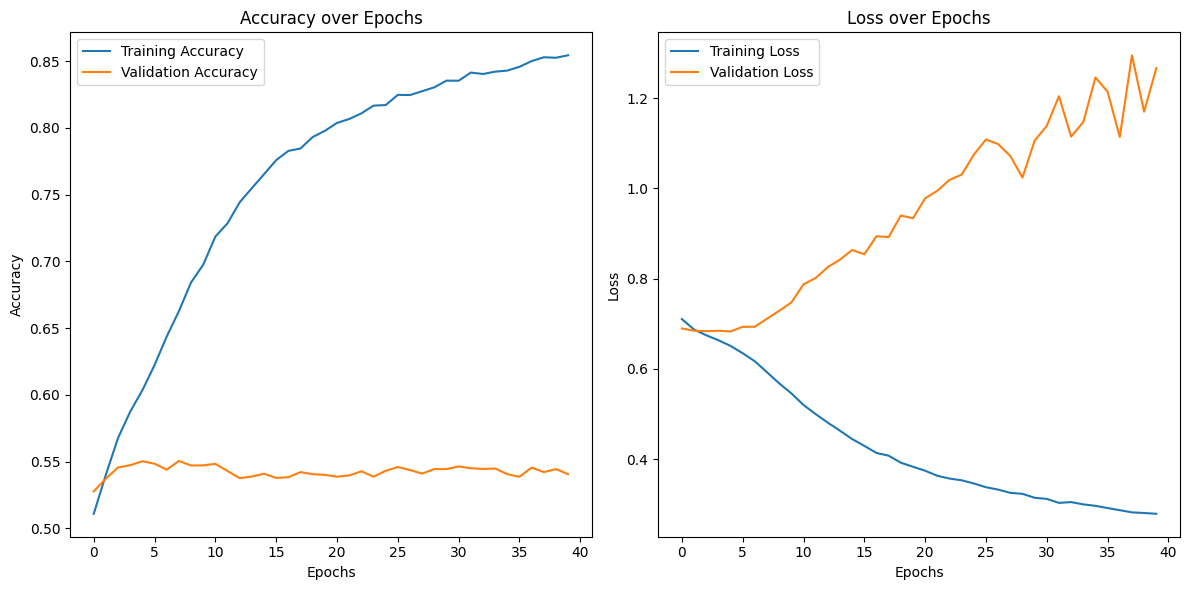

In [87]:
history_accuracy = history.history['accuracy']
history_val_accuracy = history.history['val_accuracy']
history_loss = history.history['loss']
history_val_loss = history.history['val_loss']

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_accuracy, label='Training Accuracy')
plt.plot(history_val_accuracy, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_loss, label='Training Loss')
plt.plot(history_val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Convert target to numerical format if it's not already
target_encoded = pd.get_dummies(target).values  # One-hot encoding

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, target_encoded, test_size=0.2, random_state=42
)

# Reshape the data to be 3D for LSTM input (batch_size, timesteps, features)
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential([
    # Add a max pooling layer to reduce sequence length
    MaxPooling1D(pool_size=4, input_shape=(X_train_rnn.shape[1], 1)),  # Reduce sequence length by 2
    Bidirectional(LSTM(64, activation='relu', return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(32, activation='relu')),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(target_encoded.shape[1], activation='softmax')
])

# Compile the model with an Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Implement Early Stopping to stop training once performance stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Implement ModelCheckpoint to save the best model during training
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model with the callbacks
history = model.fit(
    X_train_rnn, y_train,
    validation_data=(X_test_rnn, y_test),
    epochs=5,
    batch_size=128,
    verbose=1,
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_rnn, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Generate a classification report
y_pred = model.predict(X_test_rnn)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()
y_test_classes = tf.argmax(y_test, axis=1).numpy()
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))


Epoch 1/5
303/303 ━━━━━━━━━━━━━━━━━━━━ 314s 1s/step - accuracy: 0.5032 - loss: 0.6936 - val_accuracy: 0.5155 - val_loss: 0.6927
Epoch 2/5
303/303 ━━━━━━━━━━━━━━━━━━━━ 306s 1s/step - accuracy: 0.5006 - loss: 0.6932 - val_accuracy: 0.5120 - val_loss: 0.6931
Epoch 3/5
303/303 ━━━━━━━━━━━━━━━━━━━━ 294s 973ms/step - accuracy: 0.4975 - loss: 0.6933 - val_accuracy: 0.4848 - val_loss: 0.6932
Epoch 4/5
303/303 ━━━━━━━━━━━━━━━━━━━━ 306s 1s/step - accuracy: 0.4994 - loss: 0.6932 - val_accuracy: 0.5155 - val_loss: 0.6928
Test Accuracy: 0.52
303/303 ━━━━━━━━━━━━━━━━━━━━ 103s 337ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4694
           1       0.52      1.00      0.68      4994

    accuracy                           0.52      9688
   macro avg       0.26      0.50      0.34      9688
weighted avg       0.27      0.52      0.35      9688



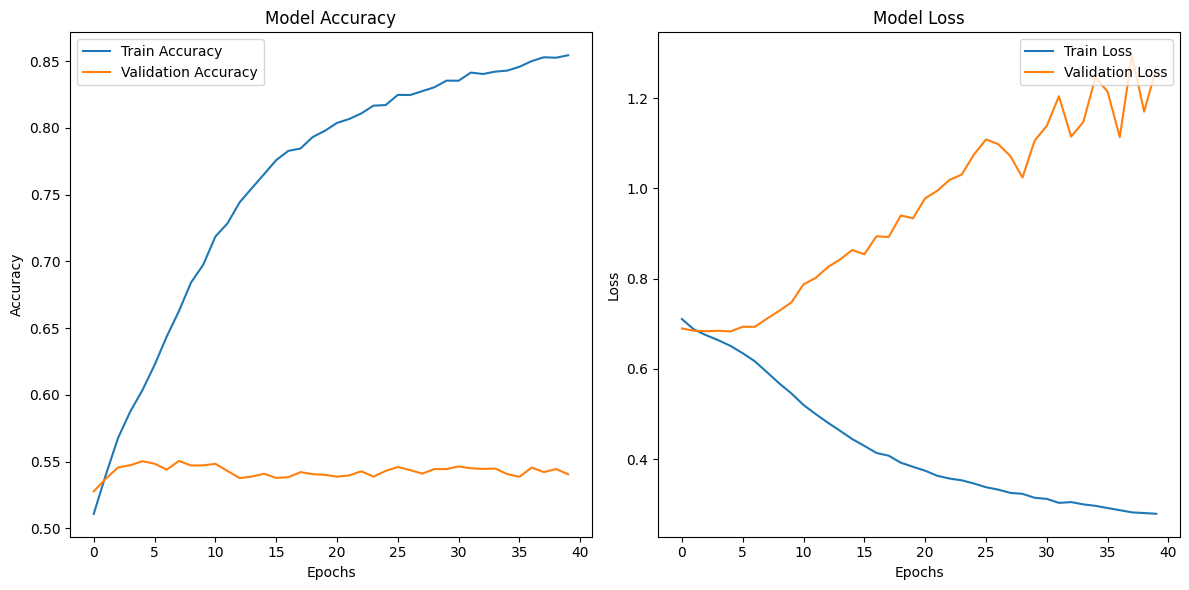

Test Accuracy of Loaded Model: 0.52
303/303 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step

Classification Report for Loaded Model:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4694
           1       0.52      1.00      0.68      4994

    accuracy                           0.52      9688
   macro avg       0.26      0.50      0.34      9688
weighted avg       0.27      0.52      0.35      9688



In [88]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('best_model.keras')

# Plot the training history
# History contains loss and accuracy metrics for both training and validation sets

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Display the plots
plt.tight_layout()
plt.show()

# Evaluate the loaded best model
test_loss, test_accuracy = best_model.evaluate(X_test_rnn, y_test, verbose=0)
print(f"Test Accuracy of Loaded Model: {test_accuracy:.2f}")

# Generate a classification report with the loaded model
y_pred = best_model.predict(X_test_rnn)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()
y_test_classes = tf.argmax(y_test, axis=1).numpy()
print("\nClassification Report for Loaded Model:")
print(classification_report(y_test_classes, y_pred_classes))


In [89]:
best_model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 289, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_18 (Bidirectional)     │ (None, 289, 128)            │          33,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_61 (Dropout)                 │ (None, 289, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_19 (Bidirectional)     │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_62 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_63 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 237,896 (929.29 KB)

 Trainable params: 79,298 (309.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 158,598 (619.53 KB)